In [106]:
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
# % matplotlib tk

UsageError: Line magic function `%` not found.


In [107]:
def extract_rec_name(file_name: str) -> str:
	end_idx = file_name.rindex('__')
	return file_name[:end_idx]


def extract_brood_id(rec_name: str) -> str:
	return rec_name[:-16]


def count_samples_per_brood(df: pd.DataFrame, agg_features = None) -> pd.DataFrame:
	if agg_features is None:
		agg_features = ['brood_id', 'class']

	agg_df = pd.DataFrame(
		data = {
			'class': df['class'],
			'recording': df['file'].apply(extract_rec_name)
		}
	)

	agg_df['brood_id'] = agg_df['recording'].apply(extract_brood_id)
	agg_df = agg_df.reset_index().groupby(agg_features).count()

	return agg_df.rename(columns = { 'index': 'sample_count' }).sort_values(by = 'class').reset_index()


def count_samples_per_file(df: pd.DataFrame) -> pd.DataFrame:
	agg_df = pd.DataFrame(
		data = {
			'class': df['class'],
			'recording': df['file'].apply(extract_rec_name)
		}
	)

	agg_features = ['recording', 'class']
	agg_df = agg_df.reset_index().groupby(agg_features).count()

	return agg_df.rename(columns = { 'index': 'sample_count' }).sort_values(by = 'class').reset_index()

In [108]:
def plot_sample_count(df: pd.DataFrame, x_label_col: str, x_rotation: str, x_label: str, title: str):
	all_colors = list(plt.get_cmap('Set3').colors)
	color_map = { }
	class_colors = []

	for i, cls in enumerate(df['class'].unique()):
		color_map[cls] = all_colors[i]

	for cls in df['class']:
		class_colors.append(color_map[cls])

	plt.figure()

	plt.bar(df[x_label_col], df['sample_count'], color = class_colors)
	# x_tick_labels = df[x_label_col]
	# if x_tick_labels.dtype == 'object':
	# 	x_tick_labels = [f'{label[:11]}...' for label in x_tick_labels]

	plt.xticks(df[x_label_col], rotation = x_rotation)
	plt.xlabel(x_label)
	plt.title(title)

	handles = [plt.Rectangle((0, 0), 1, 1, color = color_map[label]) for label in df['class'].unique()]
	plt.legend(handles, df['class'].unique())

	plt.show()

# if save_figs:
# 	plt.savefig(f'_out/{x_label}.pdf')
# else:
# 	plt.show()

## Brood size

In [164]:
bs_data = pd.read_csv(
	'_data.export/server/s2-o1/brood-size.csv', dtype = {
		'is_silence': bool,
		'class': int
	}
)
bs_data

,file,event,is_silence,class,1,2,3,4,5,recording,brood_id
0,12_1_1_22_20220626_120000__0.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
1,12_1_1_22_20220626_120000__1.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
2,12_1_1_22_20220626_120000__2.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
3,12_1_1_22_20220626_120000__3.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
4,12_1_1_22_20220626_120000__4.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
...,...,...,...,...,...,...,...,...,...,...,...
587576,Furka13_22a_20220616_173000__25.wav,feeding,False,5,0.0,0.0,0.0,0.0,1.0,Furka13_22a_20220616_173000,Furka13_22a
587577,Furka13_22a_20220616_173000__26.wav,feeding,False,5,0.0,0.0,0.0,0.0,1.0,Furka13_22a_20220616_173000,Furka13_22a
587578,Furka13_22a_20220616_173000__27.wav,feeding,False,5,0.0,0.0,0.0,0.0,1.0,Furka13_22a_20220616_173000,Furka13_22a
587579,Furka13_22a_20220616_173000__28.wav,feeding,False,5,0.0,0.0,0.0,0.0,1.0,Furka13_22a_20220616_173000,Furka13_22a


In [165]:
bs_data = bs_data[~bs_data['file'].duplicated(keep = 'first')]
bs_data

,file,event,is_silence,class,1,2,3,4,5,recording,brood_id
0,12_1_1_22_20220626_120000__0.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
1,12_1_1_22_20220626_120000__1.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
2,12_1_1_22_20220626_120000__2.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
3,12_1_1_22_20220626_120000__3.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
4,12_1_1_22_20220626_120000__4.wav,feeding,False,3,0.0,0.0,1.0,0.0,0.0,12_1_1_22_20220626_120000,12_1_1_22
...,...,...,...,...,...,...,...,...,...,...,...
587576,Furka13_22a_20220616_173000__25.wav,feeding,False,5,0.0,0.0,0.0,0.0,1.0,Furka13_22a_20220616_173000,Furka13_22a
587577,Furka13_22a_20220616_173000__26.wav,feeding,False,5,0.0,0.0,0.0,0.0,1.0,Furka13_22a_20220616_173000,Furka13_22a
587578,Furka13_22a_20220616_173000__27.wav,feeding,False,5,0.0,0.0,0.0,0.0,1.0,Furka13_22a_20220616_173000,Furka13_22a
587579,Furka13_22a_20220616_173000__28.wav,feeding,False,5,0.0,0.0,0.0,0.0,1.0,Furka13_22a_20220616_173000,Furka13_22a


In [125]:
bs_agg_df = count_samples_per_brood(bs_data[~bs_data['is_silence']])
# bs_agg_df['recording'] = bs_agg_df['recording'].apply(lambda rec: f'{rec[:16]}...')
bs_agg_df

,brood_id,class,sample_count,recording
0,Furka33_22a,1,19,19
1,Furka10_22a,1,36,36
2,1_2_1_22,2,3248,3248
3,Furka33_22a,2,4653,4653
4,8_5_1_22,2,1,1
5,10_1_1_22,3,2875,2875
6,12_1_1_22,3,747,747
7,1_3_1_22,3,2568,2568
8,1_6_1_22,3,3822,3822
9,Furka31_22a,3,6198,6198


In [62]:
bs_cls_agg_df = bs_agg_df[['class', 'sample_count']].groupby('class').sum().reset_index()
bs_cls_agg_df

,class,sample_count
0,1,78
1,2,14865
2,3,31828
3,4,81176
4,5,32949


In [111]:
bs_feeding_agg_df = count_samples_per_brood(bs_data.loc[~bs_data['is_silence'] & (bs_data['event'] == 'feeding')])
# bs_feeding_agg_df['recording'] = bs_feeding_agg_df['recording'].apply(lambda rec: f'{rec[:16]}...')
bs_feeding_agg_df

,brood_id,class,sample_count,recording
0,Furka33_22a,1,84,84
1,Furka10_22a,1,175,175
2,1_2_1_22,2,21904,21904
3,Furka33_22a,2,31806,31806
4,8_5_1_22,2,9,9
5,Furka12_22a,2,5,5
6,10_1_1_22,3,20141,20141
7,12_1_1_22,3,4967,4967
8,1_3_1_22,3,17610,17610
9,1_6_1_22,3,26187,26187


In [126]:
bs_data['recording'] = bs_data['file'].apply(extract_rec_name)
bs_data['brood_id'] = bs_data['recording'].apply(extract_brood_id)
furka33_bs2_df = bs_data[(bs_data['brood_id'] == 'Furka33_22a') & (bs_data['class'] == 2)]
furka33_bs2_agg_fg = furka33_bs2_df[['recording', 'file']].groupby('recording').count().rename(columns = { 'file': 'n_samples' })
furka33_bs2_agg_fg = furka33_bs2_agg_fg.sort_values('recording').reset_index()
furka33_bs2_agg_fg

,recording,n_samples
0,Furka33_22a_20220710_053000,1
1,Furka33_22a_20220710_153000,1
2,Furka33_22a_20220710_163000,3
3,Furka33_22a_20220710_173000,1
4,Furka33_22a_20220710_183000,9
...,...,...
249,Furka33_22a_20220727_163000,2
250,Furka33_22a_20220727_173000,16
251,Furka33_22a_20220727_183000,17
252,Furka33_22a_20220727_193000,14


In [127]:
from datetime import datetime


def rec_time(rec_title: str) -> datetime:
	return datetime(
		int(rec_title[-15:-11]), int(rec_title[-11:-9]), int(rec_title[-9:-7])
	)


val_bs2 = []
val_b2_samples = 0
prev_date = rec_time(furka33_bs2_agg_fg.iloc[0]['recording'])

i = 0
t = prev_date

while i < len(furka33_bs2_agg_fg):
	max_samples = 0
	max_rec = None

	while i < len(furka33_bs2_agg_fg) and (t - prev_date).days == 0:
		row = furka33_bs2_agg_fg.iloc[i]
		t = rec_time(row['recording'])
		i = i + 1
		if max_samples < row['n_samples']:
			max_samples = row['n_samples']
			max_rec = row['recording']

	prev_date = t
	val_b2_samples += max_samples
	val_bs2.append(max_rec)
	if val_b2_samples >= 500:
		break

# for i in range(1, len(furka33_bs2_agg_fg)):
# 	row = furka33_bs2_agg_fg.iloc[i]
# 	t = rec_time(row['rec'])
# 	if (t - prev_date).days >= 1:
# 		val_bs2.append(row['rec'])
# 		val_b2_samples += row['n_samples']
# 		prev_date = t
# 		if val_b2_samples >= 1000:
# 			break

print(val_bs2)
print(val_b2_samples)

['Furka33_22a_20220710_183000', 'Furka33_22a_20220711_193000', 'Furka33_22a_20220712_183000', 'Furka33_22a_20220713_173000', 'Furka33_22a_20220714_193000', 'Furka33_22a_20220715_063000', 'Furka33_22a_20220716_073000', 'Furka33_22a_20220717_063000', 'Furka33_22a_20220718_063000', 'Furka33_22a_20220719_083000', 'Furka33_22a_20220720_093000', 'Furka33_22a_20220721_063000', 'Furka33_22a_20220722_063000']
534


In [128]:
bs2_val_idx = bs_data['recording'].isin(val_bs2)
bs_data.loc[bs2_val_idx, 'brood_id'] = 'Furka33_22a_val'
bs_data[bs2_val_idx]

,file,event,is_silence,class,1,2,3,4,5,recording,brood_id
45340,Furka33_22a_20220710_183000__0.wav,feeding,False,2,0.0,1.0,0.0,0.0,0.0,Furka33_22a_20220710_183000,Furka33_22a_val
45341,Furka33_22a_20220710_183000__1.wav,feeding,False,2,0.0,1.0,0.0,0.0,0.0,Furka33_22a_20220710_183000,Furka33_22a_val
45342,Furka33_22a_20220710_183000__2.wav,feeding,False,2,0.0,1.0,0.0,0.0,0.0,Furka33_22a_20220710_183000,Furka33_22a_val
45343,Furka33_22a_20220710_183000__3.wav,feeding,False,2,0.0,1.0,0.0,0.0,0.0,Furka33_22a_20220710_183000,Furka33_22a_val
45344,Furka33_22a_20220710_183000__4.wav,feeding,False,2,0.0,1.0,0.0,0.0,0.0,Furka33_22a_20220710_183000,Furka33_22a_val
...,...,...,...,...,...,...,...,...,...,...,...
48991,Furka33_22a_20220713_173000__34.wav,feeding,False,2,0.0,1.0,0.0,0.0,0.0,Furka33_22a_20220713_173000,Furka33_22a_val
48992,Furka33_22a_20220713_173000__35.wav,feeding,False,2,0.0,1.0,0.0,0.0,0.0,Furka33_22a_20220713_173000,Furka33_22a_val
48993,Furka33_22a_20220713_173000__36.wav,feeding,False,2,0.0,1.0,0.0,0.0,0.0,Furka33_22a_20220713_173000,Furka33_22a_val
48994,Furka33_22a_20220713_173000__37.wav,feeding,False,2,0.0,1.0,0.0,0.0,0.0,Furka33_22a_20220713_173000,Furka33_22a_val


In [166]:
bs_data.to_csv('_data.export/server/s2-o1/brood-size.csv', index = False)

In [28]:
bs_feed_cls_agg_df = bs_feeding_agg_df[['class', 'sample_count']].groupby('class').sum().reset_index()
bs_feed_cls_agg_df

,class,sample_count
0,1,78
1,2,14865
2,3,31828
3,4,81176
4,5,32949


In [89]:
bs_contact_agg_df = count_samples_per_file(bs_data.loc[~bs_data['is_silence'] & (bs_data['event'] == 'contact')])
bs_contact_agg_df

,recording,class,sample_count
0,AT_1_2_1_22-BA04_BS02-2466C2065B90281B_2022060...,2,161
1,AT_1_2_1_22-BA10_BS02-24E144035BA44417_2022061...,2,1960
2,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,2,2641
3,Furka33_22a-BA05_BS02-248D9B02603706BB_2022071...,2,947
4,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,3,128
5,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,3,1345
6,AT_1_6_1_22-BA06_BS03-243B1F075C79F9E9_2022060...,3,253
7,AT_1_6_1_22-BA13_BS03-243B1F055AD2F48C_2022061...,3,2244
8,Furka31_22a-BA16_BS03-247AA5015FDF2A00_2022080...,3,2428
9,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,3,590


In [90]:
bs_contact_cls_agg_df = bs_contact_agg_df[['class', 'sample_count']].groupby('class').sum().reset_index()
bs_contact_cls_agg_df

,class,sample_count
0,2,5709
1,3,6988
2,4,20202
3,5,8229


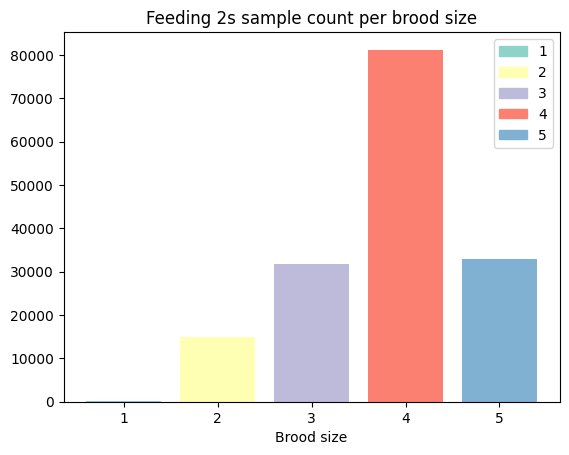

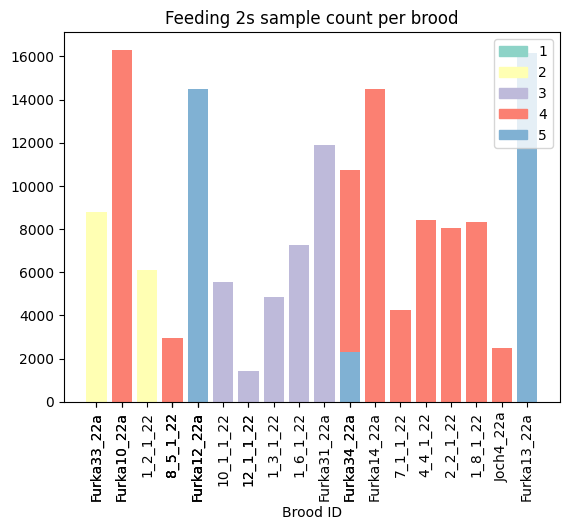

In [29]:
# plot_sample_count(
# 	bs_cls_agg_df, x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood size',
# 	title = '2s sample count per brood size'
# )

# plot_sample_count(
# 	bs_agg_df, x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Recording',
# 	title = '2s sample count per recording'
# )

plot_sample_count(
	bs_feed_cls_agg_df, x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood size',
	title = 'Feeding 2s sample count per brood size'
)

plot_sample_count(
	bs_feeding_agg_df, x_label_col = 'brood_id', x_rotation = 'vertical', x_label = 'Brood ID',
	title = 'Feeding 2s sample count per brood'
)

# plot_sample_count(
# 	bs_contact_cls_agg_df, x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood size',
# 	title = 'Contact 2s sample count per brood size'
# )

# plot_sample_count(
# 	bs_contact_agg_df, x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Recording',
# 	title = 'Contact 2s sample count per recording'
# )

## Brood age

In [171]:
ba_data = pd.read_csv(
	'_data.export/server/s2-o1/brood-age.csv', dtype = { 'is_silence': bool }
)
ba_data

,file,event,is_silence,class_min,class_max,recording,brood_id
0,12_1_1_22_20220626_120000__0.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
1,12_1_1_22_20220626_120000__1.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
2,12_1_1_22_20220626_120000__2.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
3,12_1_1_22_20220626_120000__3.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
4,12_1_1_22_20220626_120000__4.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
...,...,...,...,...,...,...,...
587576,Furka13_22a_20220616_173000__25.wav,feeding,False,18.0,19.0,Furka13_22a_20220616_173000,Furka13_22a
587577,Furka13_22a_20220616_173000__26.wav,feeding,False,18.0,19.0,Furka13_22a_20220616_173000,Furka13_22a
587578,Furka13_22a_20220616_173000__27.wav,feeding,False,18.0,19.0,Furka13_22a_20220616_173000,Furka13_22a
587579,Furka13_22a_20220616_173000__28.wav,feeding,False,18.0,19.0,Furka13_22a_20220616_173000,Furka13_22a


In [172]:
ba_data = ba_data[~ba_data['file'].duplicated(keep = 'first')]
ba_data.to_csv('_data.export/server/s2-o1/brood-age.csv', index = False)
ba_data

,file,event,is_silence,class_min,class_max,recording,brood_id
0,12_1_1_22_20220626_120000__0.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
1,12_1_1_22_20220626_120000__1.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
2,12_1_1_22_20220626_120000__2.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
3,12_1_1_22_20220626_120000__3.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
4,12_1_1_22_20220626_120000__4.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_120000,12_1_1_22
...,...,...,...,...,...,...,...
587576,Furka13_22a_20220616_173000__25.wav,feeding,False,18.0,19.0,Furka13_22a_20220616_173000,Furka13_22a
587577,Furka13_22a_20220616_173000__26.wav,feeding,False,18.0,19.0,Furka13_22a_20220616_173000,Furka13_22a
587578,Furka13_22a_20220616_173000__27.wav,feeding,False,18.0,19.0,Furka13_22a_20220616_173000,Furka13_22a
587579,Furka13_22a_20220616_173000__28.wav,feeding,False,18.0,19.0,Furka13_22a_20220616_173000,Furka13_22a


In [122]:
ba_data['recording'] = ba_data['file'].apply(extract_rec_name)
ba_data['brood_id'] = ba_data['recording'].apply(extract_brood_id)
ba_data.to_csv('_data.export/server/s10-o1/brood-age.csv', index = False)
ba_data

,file,event,is_silence,class_min,class_max,recording,brood_id
0,12_1_1_22_20220626_150000__0.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_150000,12_1_1_22
1,12_1_1_22_20220626_150000__1.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_150000,12_1_1_22
2,12_1_1_22_20220626_150000__2.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_150000,12_1_1_22
3,12_1_1_22_20220626_150000__3.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_150000,12_1_1_22
4,12_1_1_22_20220626_150000__4.wav,feeding,False,5.0,6.0,12_1_1_22_20220626_150000,12_1_1_22
...,...,...,...,...,...,...,...
83785,Furka13_22a_20220617_173000__0.wav,feeding,False,19.0,20.0,Furka13_22a_20220617_173000,Furka13_22a
83786,Furka13_22a_20220617_173000__1.wav,feeding,False,19.0,20.0,Furka13_22a_20220617_173000,Furka13_22a
83787,Furka13_22a_20220617_173000__2.wav,feeding,False,19.0,20.0,Furka13_22a_20220617_173000,Furka13_22a
83788,Furka13_22a_20220617_173000__3.wav,feeding,False,19.0,20.0,Furka13_22a_20220617_173000,Furka13_22a


In [3]:
ba_data = ba_data[~ba_data['is_silence']]
ba_data

,file,event,is_silence,class_min,class_max
0,12_1_1_22_20220627_060000__0.wav,feeding,False,6.0,7.0
1,12_1_1_22_20220627_060000__1.wav,feeding,False,6.0,7.0
2,12_1_1_22_20220627_060000__2.wav,feeding,False,6.0,7.0
3,12_1_1_22_20220627_060000__3.wav,feeding,False,6.0,7.0
4,12_1_1_22_20220627_060000__4.wav,feeding,False,6.0,7.0
...,...,...,...,...,...
161472,Furka13_22a_20220618_073000__4.wav,feeding,False,20.0,21.0
161473,Furka13_22a_20220618_073000__5.wav,feeding,False,20.0,21.0
161474,Furka13_22a_20220617_053000__0.wav,feeding,False,19.0,20.0
161475,Furka13_22a_20220617_053000__1.wav,feeding,False,19.0,20.0


In [37]:
from sfw_brood.preprocessing import group_ages

age_group_df = group_ages(ba_data, [(0, 5.5), (6, 8.5), (9, 11.5), (12, 14.5), (15, 30)])
age_group_df['brood_id'] = age_group_df['file'].apply(lambda file: extract_brood_id(extract_rec_name(file)))
age_group_df

C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\preprocessing.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df['class_min'] = age_group_df['class_min'].apply(map_age)
C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\preprocessing.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df['class_max'] = age_group_df['class_max'].apply(map_age)


,file,class,00-5.5,06-8.5,09-11.5,12-14.5,15-30,brood_id
0,Furka14_22a_20220605_203000__38.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka14_22a
1,Furka10_22a_20220603_163000__45.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka10_22a
2,Furka10_22a_20220603_163000__46.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka10_22a
3,Furka10_22a_20220603_163000__47.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka10_22a
4,Furka10_22a_20220603_163000__48.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka10_22a
...,...,...,...,...,...,...,...,...
113038,1_3_1_22_20220615_150000__22.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_3_1_22
113039,1_3_1_22_20220615_150000__23.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_3_1_22
113040,1_3_1_22_20220615_150000__24.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_3_1_22
113041,1_3_1_22_20220615_150000__10.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_3_1_22


In [42]:
age_group_df.loc[age_group_df['brood_id'] == 'Furka33_22a', ['class', 'file']].groupby('class').count()

,file
class,
00-5.5,612
06-8.5,1590
09-11.5,1389
12-14.5,1579
15-30,1426


In [43]:
validation_broods = ['Joch4_22a', 'Furka33_22a']
test_broods = ['Furka12_22a', '12_1_1_22', '8_5_1_22', '10_1_1_22', '1_6_1_22', '1_8_1_22']
train_broods = list(age_group_df['brood_id'].unique())
for brood_id in test_broods + validation_broods:
	train_broods.remove(brood_id)

In [44]:
train_age_df = age_group_df[age_group_df['brood_id'].isin(train_broods)]
train_age_df

,file,class,00-5.5,06-8.5,09-11.5,12-14.5,15-30,brood_id
0,Furka14_22a_20220605_203000__38.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka14_22a
1,Furka10_22a_20220603_163000__45.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka10_22a
2,Furka10_22a_20220603_163000__46.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka10_22a
3,Furka10_22a_20220603_163000__47.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka10_22a
4,Furka10_22a_20220603_163000__48.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka10_22a
...,...,...,...,...,...,...,...,...
113038,1_3_1_22_20220615_150000__22.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_3_1_22
113039,1_3_1_22_20220615_150000__23.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_3_1_22
113040,1_3_1_22_20220615_150000__24.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_3_1_22
113041,1_3_1_22_20220615_150000__10.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_3_1_22


In [45]:
test_age_df = age_group_df[age_group_df['brood_id'].isin(test_broods)]
test_age_df

,file,class,00-5.5,06-8.5,09-11.5,12-14.5,15-30,brood_id
11773,Furka12_22a_20220717_183000__92.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka12_22a
11774,Furka12_22a_20220717_183000__91.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka12_22a
11775,Furka12_22a_20220717_183000__90.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka12_22a
11776,Furka12_22a_20220717_183000__89.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka12_22a
11777,Furka12_22a_20220717_183000__88.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka12_22a
...,...,...,...,...,...,...,...,...
108414,1_6_1_22_20220615_080000__55.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_6_1_22
108415,1_6_1_22_20220615_080000__56.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_6_1_22
108416,1_6_1_22_20220615_080000__57.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_6_1_22
108417,1_6_1_22_20220615_080000__58.wav,15-30,0.0,0.0,0.0,0.0,1.0,1_6_1_22


In [46]:
validation_age_df = age_group_df[age_group_df['brood_id'].isin(validation_broods)]
validation_age_df

,file,class,00-5.5,06-8.5,09-11.5,12-14.5,15-30,brood_id
6419,Furka33_22a_20220711_183000__7.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka33_22a
6421,Furka33_22a_20220711_183000__6.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka33_22a
6422,Furka33_22a_20220711_183000__4.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka33_22a
6423,Furka33_22a_20220711_183000__3.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka33_22a
6424,Furka33_22a_20220711_183000__2.wav,00-5.5,1.0,0.0,0.0,0.0,0.0,Furka33_22a
...,...,...,...,...,...,...,...,...
106633,Joch4_22a_20220624_073000__6.wav,15-30,0.0,0.0,0.0,0.0,1.0,Joch4_22a
106634,Joch4_22a_20220624_073000__5.wav,15-30,0.0,0.0,0.0,0.0,1.0,Joch4_22a
106635,Joch4_22a_20220624_073000__4.wav,15-30,0.0,0.0,0.0,0.0,1.0,Joch4_22a
106636,Joch4_22a_20220624_073000__3.wav,15-30,0.0,0.0,0.0,0.0,1.0,Joch4_22a


In [47]:
train_agg_df = train_age_df[['class', 'file']].groupby('class').count()
train_agg_df = train_agg_df.rename(columns = { 'file': 'n_samples' })
train_agg_df

,n_samples
class,
00-5.5,13913
06-8.5,24604
09-11.5,15928
12-14.5,15492
15-30,16019


In [48]:
test_agg_df = test_age_df[['class', 'file']].groupby('class').count()
test_agg_df = test_agg_df.rename(columns = { 'file': 'n_samples' })
test_agg_df

,n_samples
class,
00-5.5,1527
06-8.5,4547
09-11.5,4875
12-14.5,3487
15-30,4385


In [49]:
validation_agg_df = validation_age_df[['class', 'file']].groupby('class').count()
validation_agg_df = validation_agg_df.rename(columns = { 'file': 'n_samples' })
validation_agg_df

,n_samples
class,
00-5.5,612
06-8.5,1590
09-11.5,1389
12-14.5,1990
15-30,2685


In [18]:
ba_cls_agg_df = ba_agg_df[['class', 'sample_count']].groupby('class').sum().sort_values(by = 'class').reset_index()
ba_cls_agg_df

,class,sample_count
0,00-4.5,6865
1,05-7.5,28517
2,08-10.5,22464
3,11-13.5,23041
4,14-16.5,18914
5,17-30,6886


In [95]:
ba_feed_agg_df = count_samples_per_file(ba_data.loc[~ba_data['is_silence'] & (ba_data['event'] == 'feeding')])
ba_feed_agg_df['recording'] = ba_feed_agg_df['recording'].apply(lambda rec: f'{rec[:16]}...')
ba_feed_agg_df

,recording,class,sample_count
0,Furka14_22a-BA02...,2,249
1,Furka10_22a-BA03...,3,651
2,AT_1_2_1_22-BA04...,4,200
3,Furka31_22a-BA04...,4,286
4,Furka33_22a-BA05...,5,211
5,Furka12_22a-BA06...,6,419
6,AT_1_6_1_22-BA06...,6,171
7,Furka34_22a-BA07...,7,307
8,AT_2_2_1_22-BA08...,8,248
9,Furka13_22a-BA08...,8,399


In [96]:
ba_feed_cls_agg_df = ba_feed_agg_df[['class', 'sample_count']].groupby('class').sum().sort_values(
	by = 'class').reset_index()
ba_feed_cls_agg_df

,class,sample_count
0,2,249
1,3,651
2,4,486
3,5,211
4,6,590
5,7,307
6,8,647
7,9,301
8,10,182
9,11,554


In [76]:
ba_contact_agg_df = count_samples_per_file(ba_data.loc[~ba_data['is_silence'] & (ba_data['event'] == 'contact')])
ba_contact_agg_df

,recording,class,sample_count
0,Furka14_22a-BA02_BS04-24F3190160370695_2022060...,2,287
1,Furka10_22a-BA03_BS04-24E144045FDF1AD9_2022060...,3,204
2,AT_1_2_1_22-BA04_BS02-2466C2065B90281B_2022060...,4,161
3,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,4,590
4,Furka33_22a-BA05_BS02-248D9B02603706BB_2022071...,5,947
5,Furka12_22a-BA06_BS05-24F3190160370695_2022072...,6,2194
6,AT_1_6_1_22-BA06_BS03-243B1F075C79F9E9_2022060...,6,253
7,Furka34_22a-BA07_BS04-247AA5015FDF2A00_2022061...,7,1041
8,AT_2_2_1_22-BA08_BS04-247AA5015BA4439B_2022060...,8,1932
9,Furka13_22a-BA08_BS05-248D9B02603706BB_2022060...,8,2515


In [77]:
ba_contact_cls_agg_df = ba_contact_agg_df[['class', 'sample_count']].groupby('class').sum().sort_values(
	by = 'class').reset_index()
ba_contact_cls_agg_df

,class,sample_count
0,2,287
1,3,204
2,4,751
3,5,947
4,6,2447
5,7,1041
6,8,4447
7,9,783
8,10,1960
9,11,4220


In [97]:
plot_sample_count(
	ba_agg_df.iloc[:12], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Recording',
	title = '2s samples per brood age 2 - 10'
)

plot_sample_count(
	ba_agg_df.iloc[12:], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Recording',
	title = '2s samples per brood age 11 - 18'
)

plot_sample_count(
	ba_cls_agg_df[:10], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = '2s samples per recording, age 2 - 10'
)

plot_sample_count(
	ba_cls_agg_df[10:], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = '2s samples per recording age 11 - 18'
)

plot_sample_count(
	ba_feed_agg_df.iloc[:12], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Recording',
	title = 'Feeding 2s samples per brood age 2 - 10'
)

plot_sample_count(
	ba_feed_agg_df.iloc[12:], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Recording',
	title = 'Feeding 2s samples per brood age 11 - 18'
)

plot_sample_count(
	ba_feed_cls_agg_df[:10], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = 'Feeding 2s samples per recording, age 2 - 10'
)

plot_sample_count(
	ba_feed_cls_agg_df[10:], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = 'Feeding 2s samples per recording age 11 - 18'
)

plot_sample_count(
	ba_contact_agg_df.iloc[:12], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Recording',
	title = 'Contact 2s samples per brood age 2 - 10'
)

plot_sample_count(
	ba_contact_agg_df.iloc[12:], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Recording',
	title = 'Contact 2s samples per brood age 11 - 18'
)

plot_sample_count(
	ba_contact_cls_agg_df[:10], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = 'Contact 2s samples per recording, age 2 - 10'
)

plot_sample_count(
	ba_contact_cls_agg_df[10:], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = 'Contact 2s samples per recording age 11 - 18'
)

### Age grouping

In [100]:
from sfw_brood.preprocessing import group_ages
from sklearn.preprocessing import OneHotEncoder

c:\users\barto\devel\repos\pycharmprojects\snowfinchwire.broodanalyzer\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [117]:
age_group_df = group_ages(
	ba_data[~ba_data['is_silence'] & (ba_data['event'] == 'feeding')],
	# groups = [(0, 5), (6, 8), (9, 12), (13, 30)]
	groups = [(0, 4), (5, 7), (8, 10), (11, 13), (14, 30)]
)
age_group_df

C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\preprocessing.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df['class'] = age_group_df['class'].apply(map_age)


,file,class,00-04,05-07,08-10,11-13,14-30
0,AT_1_2_1_22-BA04_BS02-2466C2065B90281B_2022060...,00-04,1.0,0.0,0.0,0.0,0.0
1,Furka10_22a-BA03_BS04-24E144045FDF1AD9_2022060...,00-04,1.0,0.0,0.0,0.0,0.0
2,Furka10_22a-BA03_BS04-24E144045FDF1AD9_2022060...,00-04,1.0,0.0,0.0,0.0,0.0
3,Furka10_22a-BA03_BS04-24E144045FDF1AD9_2022060...,00-04,1.0,0.0,0.0,0.0,0.0
4,Furka10_22a-BA03_BS04-24E144045FDF1AD9_2022060...,00-04,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5848,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,14-30,0.0,0.0,0.0,0.0,1.0
5849,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,14-30,0.0,0.0,0.0,0.0,1.0
5850,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,14-30,0.0,0.0,0.0,0.0,1.0
5851,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,14-30,0.0,0.0,0.0,0.0,1.0


In [118]:
age_group_agg_df = age_group_df[['file', 'class']].groupby('class').count()
# age_group_agg_df = age_group_agg_df.reset_index().drop(columns = 'index').rename(columns = { 'file': 'sample_count' })
age_group_agg_df

,file
class,
00-04,1386
05-07,1108
08-10,1130
11-13,1185
14-30,1044


In [134]:
pred_df = pd.read_csv('_data.export/pred.csv')
pred_df

,Unnamed: 0,file,start_time,end_time,0.0-5.5,12.0-14.5,15.0-30.0,6.0-8.5,9.0-11.5
0,0,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0,10.0,0.145375,0.002373,0.000947,0.821907,0.029398
1,1,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0,10.0,0.041199,0.000332,0.000175,0.939115,0.019179
2,2,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0,10.0,0.673341,0.002104,0.000701,0.305342,0.018513
3,3,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0,10.0,0.417363,0.003195,0.001411,0.557213,0.020818
4,4,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0,10.0,0.307838,0.000813,0.000545,0.674995,0.015808
...,...,...,...,...,...,...,...,...,...
4540,4540,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0,10.0,0.005258,0.004524,0.001065,0.789088,0.200065
4541,4541,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0,10.0,0.020158,0.002010,0.000486,0.884838,0.092508
4542,4542,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0,10.0,0.001565,0.000547,0.000138,0.881197,0.116554
4543,4543,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0,10.0,0.000739,0.000094,0.000016,0.956540,0.042612


In [138]:
test_df = pd.read_csv('_data.export/test-data.csv')
test_df = test_df.set_index('file')
test_df

,0.0-5.5,12.0-14.5,15.0-30.0,6.0-8.5,9.0-11.5
file,,,,,
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/12_1_1_22_20220625_150000__0.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__21.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__20.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__19.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__18.wav,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220609_050000__37.wav,0.0,0.0,0.0,0.0,1.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220609_050000__38.wav,0.0,0.0,0.0,0.0,1.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220609_050000__39.wav,0.0,0.0,0.0,0.0,1.0


In [136]:
y_true = pd.read_csv('_data.export/y-true.csv')
y_true

,file,0
0,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0-5.5
1,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0-5.5
2,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0-5.5
3,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0-5.5
4,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,0.0-5.5
...,...,...
4552,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,9.0-11.5
4553,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,9.0-11.5
4554,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,9.0-11.5
4555,/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1...,9.0-11.5


In [141]:
true_df = test_df.loc[pred_df.file, test_df.columns]
true_df

,0.0-5.5,12.0-14.5,15.0-30.0,6.0-8.5,9.0-11.5
file,,,,,
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__21.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__18.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__16.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__15.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__12.wav,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220609_050000__27.wav,0.0,0.0,0.0,0.0,1.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220609_050000__30.wav,0.0,0.0,0.0,0.0,1.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220609_050000__32.wav,0.0,0.0,0.0,0.0,1.0


In [143]:
len(test_df.index.unique())

9689

In [152]:
test_df.loc[~test_df.index.duplicated(keep = 'first')].loc[pred_df.file, test_df.columns]

,0.0-5.5,12.0-14.5,15.0-30.0,6.0-8.5,9.0-11.5
file,,,,,
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__21.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__18.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__16.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__15.wav,1.0,0.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220604_200000__12.wav,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220609_050000__27.wav,0.0,0.0,0.0,0.0,1.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220609_050000__30.wav,0.0,0.0,0.0,0.0,1.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_8_1_22_20220609_050000__32.wav,0.0,0.0,0.0,0.0,1.0


In [153]:
test_df.loc[test_df.index.duplicated(keep = 'first')]

,0.0-5.5,12.0-14.5,15.0-30.0,6.0-8.5,9.0-11.5
file,,,,,
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/10_1_1_22_20220627_160000__0.wav,0.0,1.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/10_1_1_22_20220627_170000__5.wav,0.0,1.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/10_1_1_22_20220627_170000__6.wav,0.0,1.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/10_1_1_22_20220627_170000__4.wav,0.0,1.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/10_1_1_22_20220627_170000__3.wav,0.0,1.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/10_1_1_22_20220627_170000__0.wav,0.0,1.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/10_1_1_22_20220627_170000__2.wav,0.0,1.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/10_1_1_22_20220627_170000__1.wav,0.0,1.0,0.0,0.0,0.0
/home/gardzielb/sfw-brood-work/s10-o1/s10.0-o1.0/1_6_1_22_20220615_090000__3.wav,0.0,0.0,1.0,0.0,0.0
